In [ ]:
from matplotlib import pyplot as plt
from matplotlib import image as img
import os
import random
from PIL import Image
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "aditya0agarwal"
os.environ['KAGGLE_KEY'] = "efc2f02bd3df0ac76b07e10e42340858"

!kaggle datasets download -d meetnagadia/human-action-recognition-har-dataset

Dataset URL: https://www.kaggle.com/datasets/meetnagadia/human-action-recognition-har-dataset
License(s): ODbL-1.0
 99% 295M/297M [00:02<00:00, 120MB/s]
100% 297M/297M [00:02<00:00, 114MB/s]


In [ ]:
!unzip human-action-recognition-har-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Human Action Recognition/train/Image_5499.jpg  
  inflating: Human Action Recognition/train/Image_55.jpg  
  inflating: Human Action Recognition/train/Image_550.jpg  
  inflating: Human Action Recognition/train/Image_5500.jpg  
  inflating: Human Action Recognition/train/Image_5501.jpg  
  inflating: Human Action Recognition/train/Image_5502.jpg  
  inflating: Human Action Recognition/train/Image_5503.jpg  
  inflating: Human Action Recognition/train/Image_5504.jpg  
  inflating: Human Action Recognition/train/Image_5505.jpg  
  inflating: Human Action Recognition/train/Image_5506.jpg  
  inflating: Human Action Recognition/train/Image_5507.jpg  
  inflating: Human Action Recognition/train/Image_5508.jpg  
  inflating: Human Action Recognition/train/Image_5509.jpg  
  inflating: Human Action Recognition/train/Image_551.jpg  
  inflating: Human Action Recognition/train/Image_5510.jpg  
  inflating: Human Action Recognition/

In [ ]:
data = pd.read_csv('/content/Human Action Recognition/Training_set.csv')

In [ ]:
data

filename               label
0          Image_1.jpg             sitting
1          Image_2.jpg        using_laptop
2          Image_3.jpg             hugging
3          Image_4.jpg            sleeping
4          Image_5.jpg        using_laptop
...                ...                 ...
12595  Image_12596.jpg             sitting
12596  Image_12597.jpg            clapping
12597  Image_12598.jpg             sitting
12598  Image_12599.jpg             dancing
12599  Image_12600.jpg  listening_to_music

[12600 rows x 2 columns]

In [ ]:
counts = data['label'].value_counts()
counts

label
sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: count, dtype: int64

In [ ]:
def chooserandom(n=1):
    plt.figure(figsize=(30,30))
    for i in range(n):
        rnd = random.randint(0,len(data)-1)
        img_file = '/content/Human Action Recognition/train/' + data['filename'][rnd]

        if os.path.exists(img_file):
            plt.subplot(n//2+1, 2, i + 1)
            image = img.imread(img_file)
            plt.imshow(image)
            plt.title(data['label'][rnd])

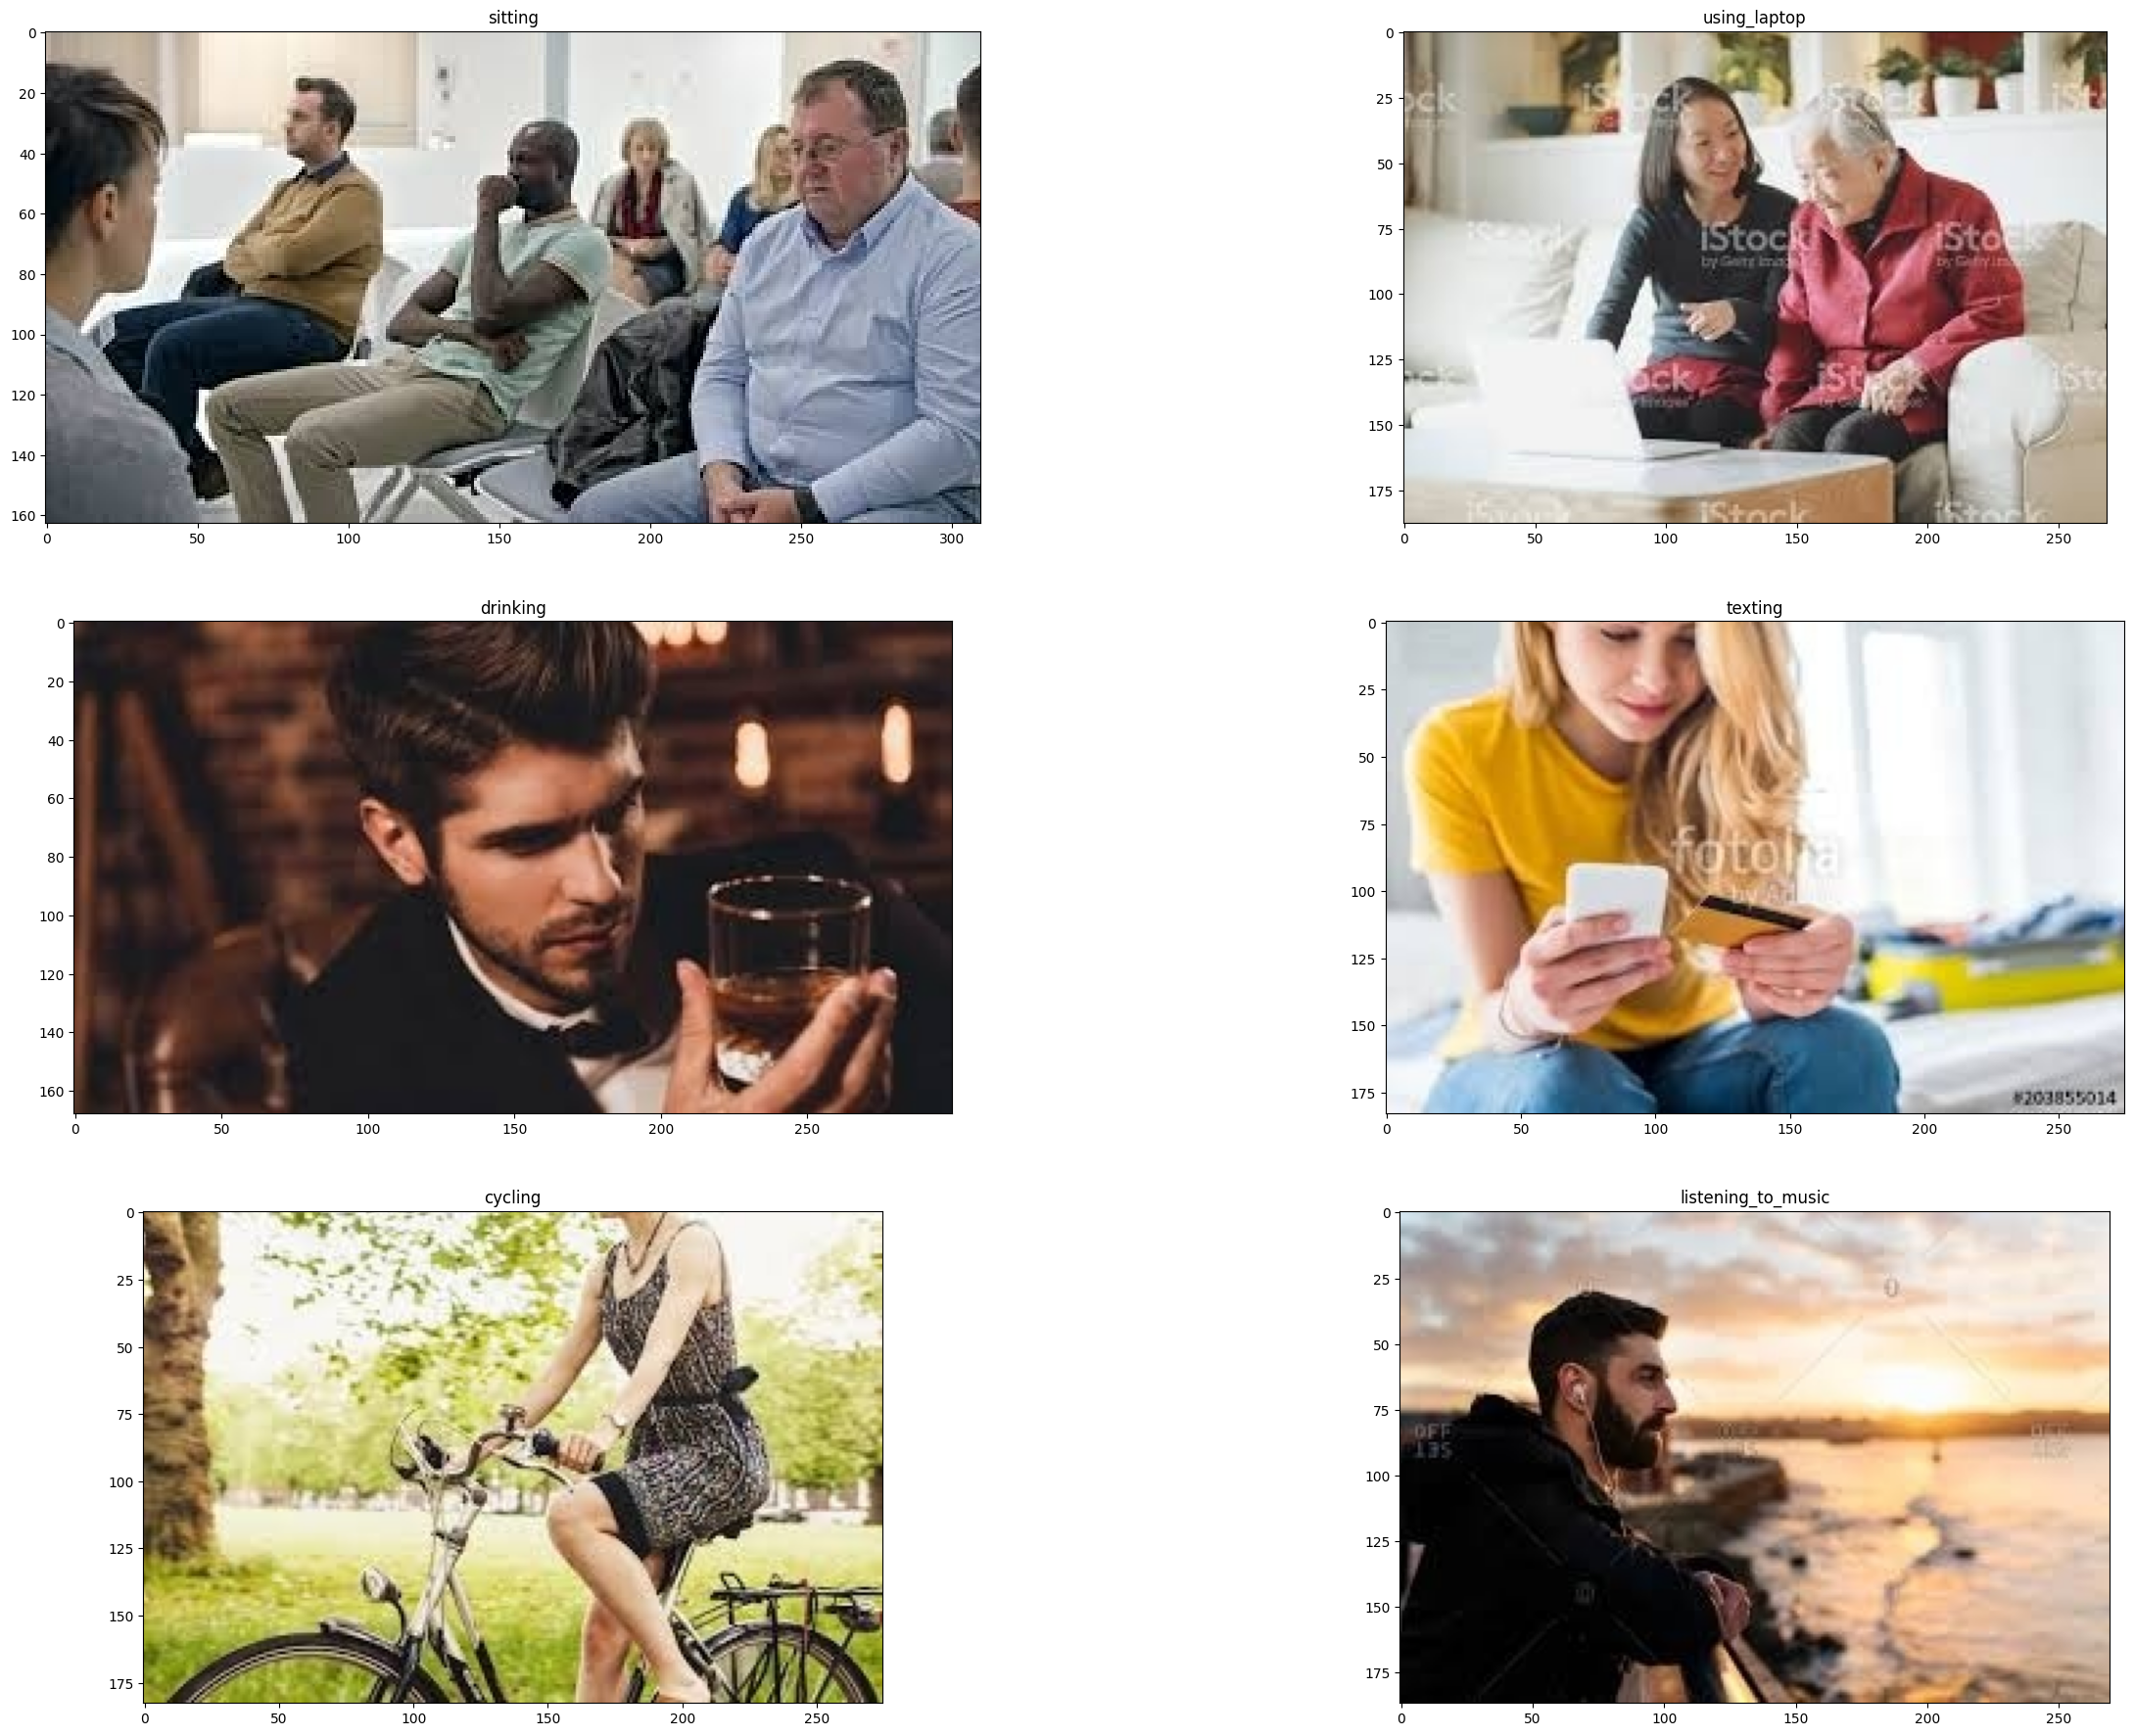

In [ ]:
chooserandom(6)

In [ ]:
encode = LabelBinarizer()
y = encode.fit_transform(data['label'])
classes = encode.classes_
print(classes)

['calling' 'clapping' 'cycling' 'dancing' 'drinking' 'eating' 'fighting'
 'hugging' 'laughing' 'listening_to_music' 'running' 'sitting' 'sleeping'
 'texting' 'using_laptop']


In [ ]:
x = data['filename'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=100)

In [ ]:
img_data = []
size = len(x_train)

for i in range(size):
    image = Image.open('/content/Human Action Recognition/train/' + x_train[i])
    img_data.append(np.asarray(image.resize((160,160))))

In [ ]:
model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(160,160,3),
                   pooling='avg',classes=15,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(15, activation='softmax'))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 14985039 (57.16 MB)
Trainable params: 270351 (1.03 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
history = model.fit(np.asarray(img_data), y_train, epochs=90)

Epoch 1/90
355/355 [==============================] - 32s 70ms/step - loss: 2.2096 - accuracy: 0.4414
Epoch 2/90
355/355 [==============================] - 23s 66ms/step - loss: 1.2148 - accuracy: 0.6080
Epoch 3/90
355/355 [==============================] - 24s 68ms/step - loss: 0.9258 - accuracy: 0.6983
Epoch 4/90
355/355 [==============================] - 23s 65ms/step - loss: 0.6919 - accuracy: 0.7712
Epoch 5/90
355/355 [==============================] - 23s 66ms/step - loss: 0.5180 - accuracy: 0.8329
Epoch 6/90
355/355 [==============================] - 23s 66ms/step - loss: 0.3605 - accuracy: 0.8836
Epoch 7/90
355/355 [==============================] - 23s 66ms/step - loss: 0.2403 - accuracy: 0.9263
Epoch 8/90
355/355 [==============================] - 24s 66ms/step - loss: 0.1834 - accuracy: 0.9432
Epoch 9/90
355/355 [==============================] - 24s 66ms/step - loss: 0.1684 - accuracy: 0.9489
Epoch 10/90
355/355 [==============================] - 24s 66ms/step - loss: 0.145

In [ ]:
def imread(fn):
    image = Image.open(fn)
    return np.asarray(image.resize((160,160)))

In [ ]:
def recognize(test_image):
    result = model.predict(np.asarray([imread(test_image)]))

    itemindex = np.where(result==np.max(result))
    prediction = classes[itemindex[1][0]]
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", prediction)

    image = img.imread(test_image)
    plt.imshow(image)
    plt.title(prediction)

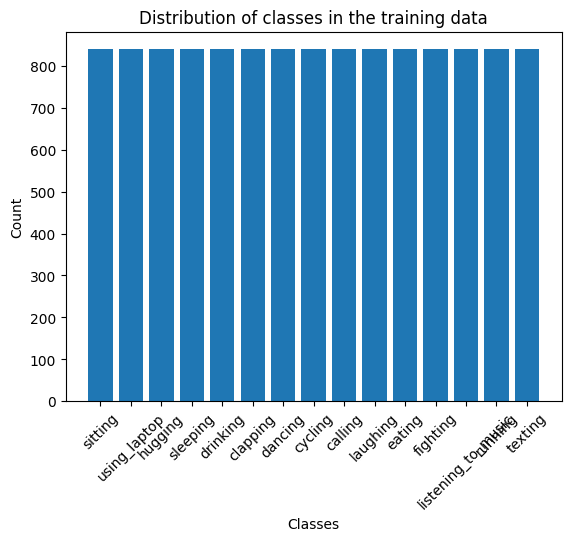

In [ ]:
plt.bar(counts.index, counts.values)
plt.title('Distribution of classes in the training data')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
model.save('activity_reco.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


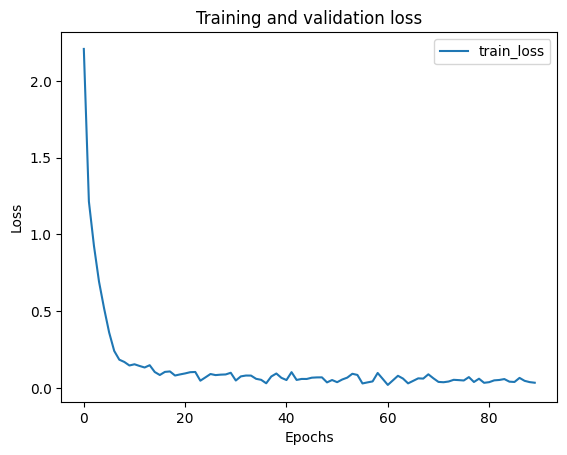

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

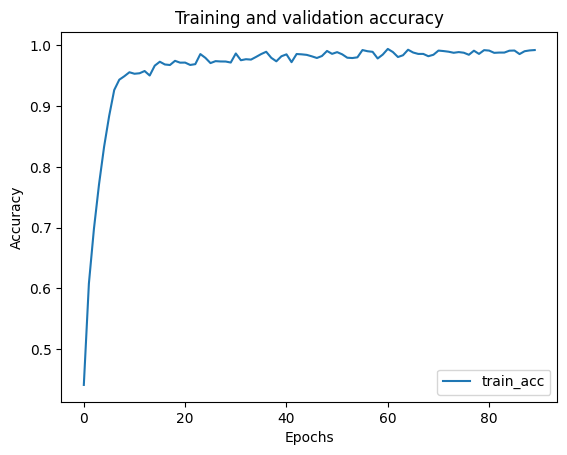

In [ ]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('/content/drive/MyDrive/activity_reco.h5')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

1/1 [==============================] - 1s 591ms/step
probability: 100.0%
Predicted class :  sleeping


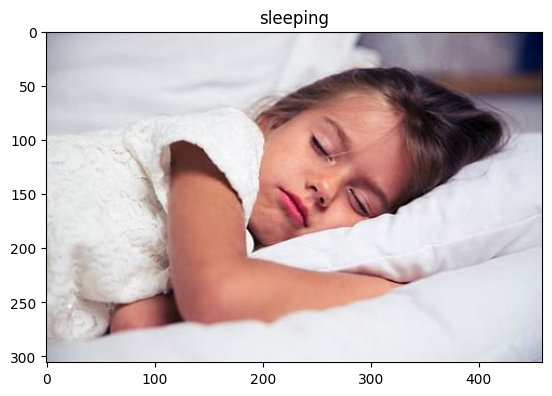

In [ ]:
recognize('/content/sleeping.jpg')

1/1 [==============================] - 1s 1s/step
probability: 99.90905523300171%
Predicted class :  eating


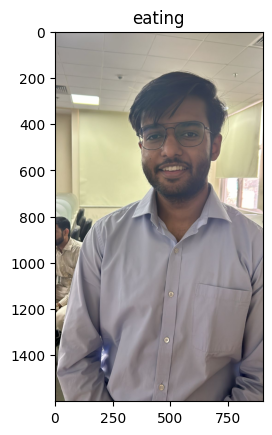

In [ ]:
recognize('/content/photo.jpeg')

1/1 [==============================] - 0s 492ms/step
probability: 100.0%
Predicted class :  dancing


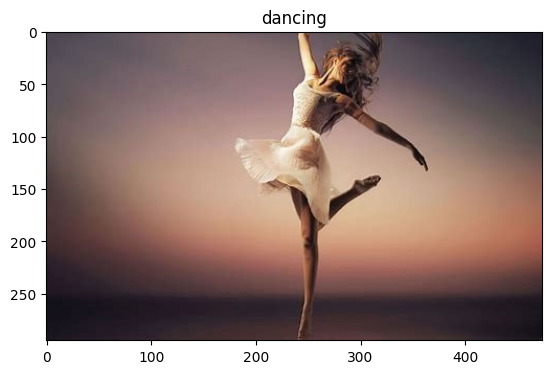

In [ ]:
recognize('/content/dancing.jpg')

1/1 [==============================] - 0s 303ms/step
probability: 99.99995231628418%
Predicted class :  texting


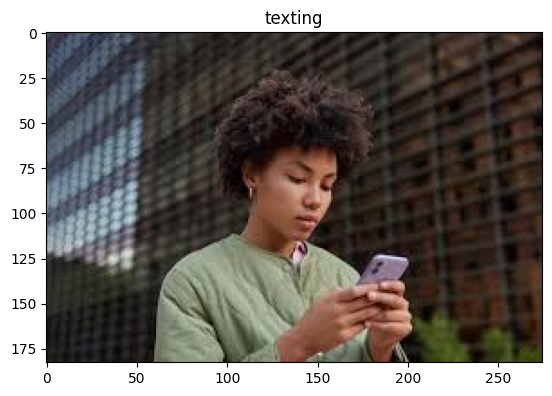

In [ ]:
recognize('/content/texting.jpg')

In [ ]:
img_test= []
size = len(x_test)
for i in tqdm(range(size)):
    image = Image.open('/content/Human Action Recognition/train/' + x_test[i])
    img_test.append(np.asarray(image.resize((160,160))))
Acc = model.evaluate(np.asarray(img_test), y_test)*100
print(f"Accuracy: {Acc [1]}")

  0%|          | 0/1260 [00:00<?, ?it/s]

40/40 [==============================] - 10s 111ms/step - loss: 9.2843 - accuracy: 0.5397
Accuracy: 0.5396825671195984


In [ ]:
img_test = np.asarray(img_test)

In [ ]:
# Make predictions on test data
y_pred = model.predict(img_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert predictions to class labels


40/40 [==============================] - 3s 61ms/step


In [ ]:
y_pred_shape = y_pred.shape

In [ ]:
y_pred_shape

(1260,)

In [ ]:
# Convert y_test to match the shape of y_pred
if y_test.ndim == 1:
    y_test = tf.keras.utils.to_categorical(y_test, num_classes=y_pred_shape[-1])
elif y_test.shape != y_pred_shape:
    y_test = y_test.argmax(axis=1)

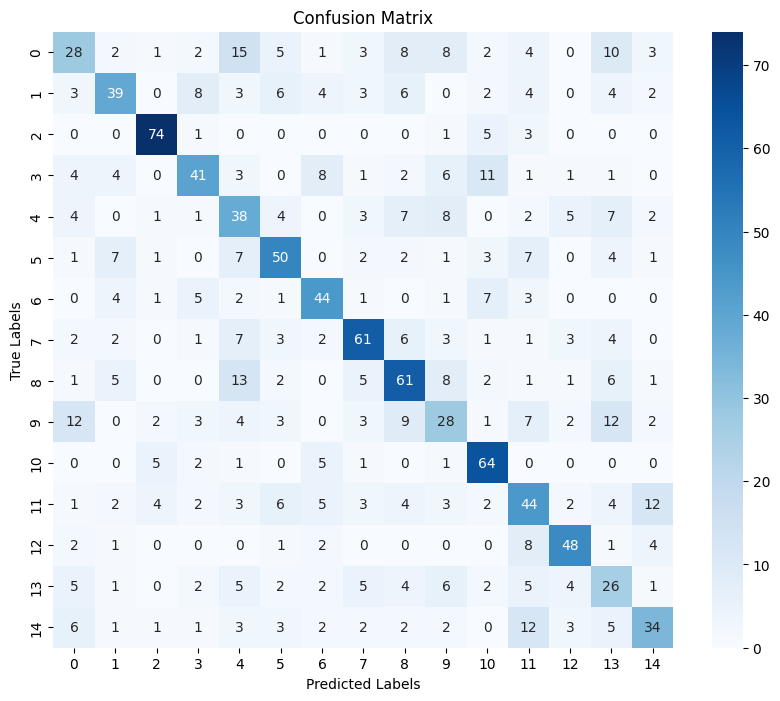

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Generate classification matrix
conf_mat = confusion_matrix(y_test, y_pred)
# Get the class labels
class_labels = list(np.unique(y_test))
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.30      0.35        92
           1       0.57      0.46      0.51        84
           2       0.82      0.88      0.85        84
           3       0.59      0.49      0.54        83
           4       0.37      0.46      0.41        82
           5       0.58      0.58      0.58        86
           6       0.59      0.64      0.61        69
           7       0.66      0.64      0.65        96
           8       0.55      0.58      0.56       106
           9       0.37      0.32      0.34        88
          10       0.63      0.81      0.71        79
          11       0.43      0.45      0.44        97
          12       0.70      0.72      0.71        67
          13       0.31      0.37      0.34        70
          14       0.55      0.44      0.49        77

    accuracy                           0.54      1260
   macro avg       0.54      0.54      0.54      1260
wei